In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=[(0, 0), (4, 4)], random_state=0)

# Apply a linear transformation to make the blobs elliptical
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X = np.dot(X, transformation) 

# Add another spherical blob
X2, y2 = make_blobs(n_samples=150, centers=[(-2, -2)], cluster_std=0.5, random_state=0)
X = np.vstack((X, X2))

In [3]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

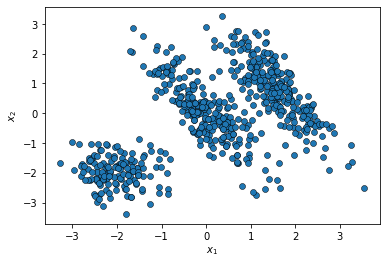

In [4]:
plot_data(X)

In [5]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(X)

In [6]:
print(gmm.n_iter_)

2


In [7]:
print('Weights:', gmm.weights_)
print('Means:\n', gmm.means_)
print('Covariances:\n', gmm.covariances_)

Weights: [0.23077331 0.38468283 0.38454386]
Means:
 [[-2.01578902 -1.95662033]
 [-0.03230299  0.03527593]
 [ 1.56421574  0.80307925]]
Covariances:
 [[[ 0.254315   -0.01588303]
  [-0.01588303  0.24474151]]

 [[ 0.41202765 -0.53078979]
  [-0.53078979  0.99966631]]

 [[ 0.35577946 -0.48222654]
  [-0.48222654  0.98318187]]]


In [8]:
def plot_clusters(X, labels):    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

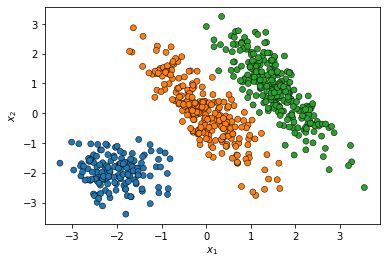

In [9]:
plot_clusters(X, labels)
plt.savefig('figures/elliptical_blobs_gmm.pdf')

In [10]:
prob = gmm.predict_proba(X)

In [11]:
print('x =', X[0])
print('prob =', prob[0])

x = [ 2.41692591 -0.07769481]
prob = [3.11052582e-21 8.85973054e-10 9.99999999e-01]


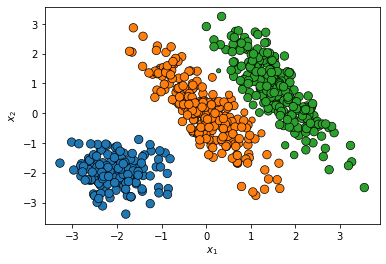

In [12]:
sizes = prob.max(axis=1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, size=sizes, palette='tab10', edgecolor='k', legend=False)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig('figures/elliptical_blobs_gmm_prob.pdf')

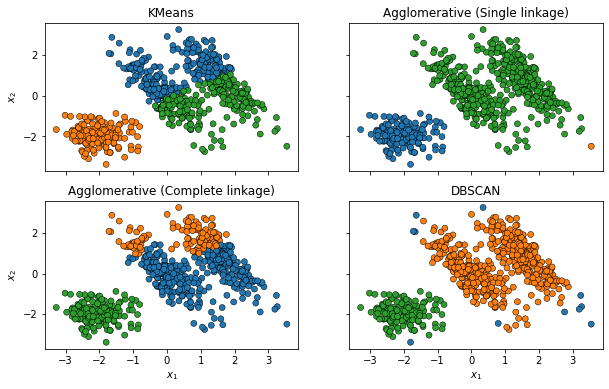

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 6))

plt.sca(axes[0, 0])
kmeans = KMeans(n_clusters=3, random_state=0) 
labels = kmeans.fit_predict(X)
plot_clusters(X, labels)
plt.title('KMeans')

plt.sca(axes[0, 1])
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = agg.fit_predict(X)
plot_clusters(X, labels)
plt.title('Agglomerative (Single linkage)')

plt.sca(axes[1, 0])
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)
plot_clusters(X, labels)
plt.title('Agglomerative (Complete linkage)')

plt.sca(axes[1, 1])
dbscan = DBSCAN()
labels = dbscan.fit_predict(X)
plot_clusters(X, labels)
plt.title('DBSCAN')

plt.savefig('figures/elliptical_blobs_clustering_comparison.pdf')

In [19]:
print(f'AIC = {gmm.aic(X):.3f}')
print(f'BIC = {gmm.bic(X):.3f}')

AIC = 4061.318
BIC = 4110.565
